<a href="https://colab.research.google.com/github/kuruvajayanth12/Neural-Networks-and-Deep-Learning/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download(
    "navoneel/brain-mri-images-for-brain-tumor-detection"
)

print("Dataset path:", path)


Using Colab cache for faster access to the 'brain-mri-images-for-brain-tumor-detection' dataset.
Dataset path: /kaggle/input/brain-mri-images-for-brain-tumor-detection


This first cell downloads the dataset from Kaggle Hub, specifically the 'brain-mri-images-for-brain-tumor-detection' dataset. It then prints the local path where the dataset is stored.

This cell imports all the necessary libraries for building and training a Convolutional Neural Network (CNN) using TensorFlow and Keras. These include `os` for operating system interaction, `tensorflow` for deep learning, `numpy` for numerical operations, `matplotlib.pyplot` for plotting, and various modules from `tensorflow.keras` for image data processing, model building, and layers.

Here, global parameters `IMG_SIZE` and `BATCH_SIZE` are defined. `data_dir` is set to the path where the Kaggle dataset was downloaded. An `ImageDataGenerator` is initialized to rescale image pixel values to be between 0 and 1, and to split the data into training (80%) and validation (20%) sets. Then, `flow_from_directory` is used to create `train_generator` and `val_generator` which will efficiently load and augment images from the specified directory in batches for training and validation, respectively. The `class_mode='binary'` suggests a binary classification task.

This cell defines the CNN model architecture using Keras's `Sequential` API. It consists of:
- **Convolutional Layers (`Conv2D`)**: Extract features from images using filters.
- **Max Pooling Layers (`MaxPooling2D`)**: Reduce the spatial dimensions of the feature maps, helping to make the model more robust to variations.
- **Flatten Layer**: Converts the 2D feature maps into a 1D vector to be fed into dense layers.
- **Dense Layers (`Dense`)**: Fully connected layers for classification.
- **Dropout Layer (`Dropout`)**: A regularization technique to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.

The model is compiled with the `adam` optimizer, `binary_crossentropy` loss function (suitable for binary classification), and `accuracy` as the metric. Finally, `model.summary()` prints a summary of the model's layers and parameters.

This cell trains the defined model using the `train_generator` for 10 epochs. It also evaluates the model's performance on the `val_generator` after each epoch. The training history (loss and accuracy for both training and validation sets) is stored in the `history` variable.

This cell defines a function `predict_image` that takes an image path as input. Inside the function:
- It loads and resizes the image.
- Converts the image to a NumPy array and normalizes its pixel values.
- Adds an extra dimension to the array to match the model's input shape.
- Uses the trained `model` to make a prediction on the image.
- Displays the image using `matplotlib`.
- Based on the prediction (thresholded at 0.5 for binary classification), it prints whether a 'Tumor Detected' or 'No Tumor Detected' and displays a corresponding title on the plot.

This cell demonstrates the `predict_image` function. It constructs a path to a sample image within the 'yes' subdirectory of the downloaded dataset (indicating a tumor). Then, it calls `predict_image` with this sample image path to show how the model performs on a single image.

In [7]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [8]:
IMG_SIZE = 224
BATCH_SIZE = 32

data_dir = path

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.2184 - loss: 0.6543 - val_accuracy: 0.1900 - val_loss: 0.5228
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.1936 - loss: 0.5693 - val_accuracy: 0.1900 - val_loss: 0.3237
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.1819 - loss: 0.5587 - val_accuracy: 0.1900 - val_loss: 0.3582
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.2226 - loss: 0.6138 - val_accuracy: 0.1900 - val_loss: 0.4104
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.1970 - loss: 0.5046 - val_accuracy: 0.1900 - val_loss: 0.4404
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.1953 - loss: 0.5810 - val_accuracy: 0.1900 - val_loss: 0.4041
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.1993 - loss: 0.4806 - val_accuracy: 0.1900 - val_loss: 0.3951
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.1853 - loss: 0.4061 - val_accuracy: 0.1900 - val_loss:

In [11]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    plt.imshow(img)
    plt.axis('off')

    if prediction[0][0] > 0.5:
        plt.title("Tumor Detected ❌", color='red')
        print("Tumor Detected")
    else:
        plt.title("No Tumor ✅", color='green')
        print("No Tumor Detected")

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Tumor Detected


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


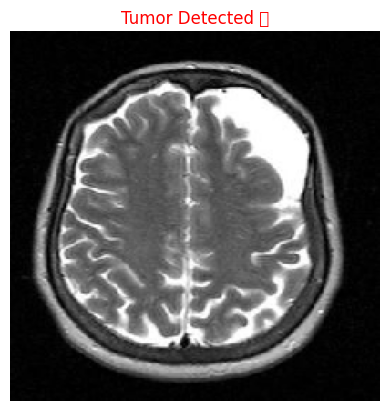

In [12]:
# Example image path
test_img = os.path.join(data_dir, "yes", os.listdir(os.path.join(data_dir, "yes"))[0])

predict_image(test_img)
